# K-Means algorithm implementation for Customer Segmentation

## Intall packages

In [1]:
!pip install numpy
!pip install Pandas
!pip install matplotlib

## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Read data from csv exported from Database - *name file as final_points.csv

In [4]:
# Importing the dataset
buyer = pd.read_csv('cust_seg_1500.csv')

print('First look at the data set: ')
print(buyer.head())

First look at the data set: 
   id                             Company Name  Company id  Count Page View  \
0   0  H√ºttenes-Albertus Chemische Werke GmbH         326         0.107686   
1   1                                 Impag AG       23107         0.000558   
2   2          STOCKMEIER Chemie GmbH & Co. KG       10176         0.004743   
3   3                  Rascor International AG        3406         0.053703   
4   4           JARBUR EUROCHEM Sp√≥≈Çka Jawna       19068         1.000000   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.333011        0.085443      0.065574          0.228916   
1      0.000000        0.041139      0.000000          0.003442   
2      0.000968        0.037975      1.000000          0.024096   
3      0.075508        0.031646      0.016393          0.180723   
4      0.913843        0.661392      0.016393          0.838210   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                   0.020527  

In [6]:
from sklearn.cluster import KMeans  
from pandas import DataFrame
data = DataFrame(buyer, columns=['Company Name','Company id','Count Page View','Count Search', 'Count Requests','Count Orders', 'Count Session Id', 'Total Order Value In Euro', 'Monetize Amount','Final Points','Groups on Final Points'])

CountRequests = data['Count Requests']
PageCount =data['Count Page View']
CountSearch = data['Count Search']
CountOrders =data['Count Orders']
CountSessionId =data['Count Session Id']
TotalOrder =data['Total Order Value In Euro']
MonetizeAmount =data['Monetize Amount']

print('First look at the data set: ')
print(data.head())

First look at the data set: 
                              Company Name  Company id  Count Page View  \
0  H√ºttenes-Albertus Chemische Werke GmbH         326         0.107686   
1                                 Impag AG       23107         0.000558   
2          STOCKMEIER Chemie GmbH & Co. KG       10176         0.004743   
3                  Rascor International AG        3406         0.053703   
4           JARBUR EUROCHEM Sp√≥≈Çka Jawna       19068         1.000000   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.333011        0.085443      0.065574          0.228916   
1      0.000000        0.041139      0.000000          0.003442   
2      0.000968        0.037975      1.000000          0.024096   
3      0.075508        0.031646      0.016393          0.180723   
4      0.913843        0.661392      0.016393          0.838210   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                   0.020527         1.000000    465.7

## Zipping data in numpy array

In [7]:
points_data = np.array(list(zip(CountRequests, PageCount,CountSearch,CountOrders,CountSessionId,TotalOrder,MonetizeAmount)))
#print(points_data)
print(points_data)

[[8.54430380e-02 1.07685870e-01 3.33010649e-01 ... 2.28915663e-01
  2.05267650e-02 1.00000000e+00]
 [4.11392410e-02 5.57958000e-04 0.00000000e+00 ... 3.44234100e-03
  0.00000000e+00 8.40336134e-01]
 [3.79746840e-02 4.74264200e-03 9.68054000e-04 ... 2.40963860e-02
  1.00000000e+00 0.00000000e+00]
 ...
 [3.16455700e-03 1.53438420e-02 1.64569220e-02 ... 4.30292600e-02
  0.00000000e+00 0.00000000e+00]
 [9.49367100e-03 9.34579400e-03 1.25847050e-02 ... 2.75387260e-02
  0.00000000e+00 0.00000000e+00]
 [9.49367100e-03 1.22750730e-02 1.64569220e-02 ... 2.06540450e-02
  0.00000000e+00 0.00000000e+00]]


## Clustering data with K-means algorithm and exporting data in ClusteredTestIteration.csv file - 3 Clusters

In [35]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++',n_init=1, max_iter=5000, tol=0.0001, verbose=0, random_state=None)
KmeansClusterPredicted_3Clusters = kmeans.fit_predict(points_data)


df = pd.DataFrame(data=KmeansClusterPredicted_3Clusters,columns=["Column1"])
data = data.assign(KmeansClusterPredicted_3Clusters=KmeansClusterPredicted_3Clusters)
#print(data)
data.to_csv('ClusteredTestIteration.csv')
print(data.head())

                              Company Name  Company id  Count Page View  \
0  H√ºttenes-Albertus Chemische Werke GmbH         326         0.107686   
1                                 Impag AG       23107         0.000558   
2          STOCKMEIER Chemie GmbH & Co. KG       10176         0.004743   
3                  Rascor International AG        3406         0.053703   
4           JARBUR EUROCHEM Sp√≥≈Çka Jawna       19068         1.000000   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.333011        0.085443      0.065574          0.228916   
1      0.000000        0.041139      0.000000          0.003442   
2      0.000968        0.037975      1.000000          0.024096   
3      0.075508        0.031646      0.016393          0.180723   
4      0.913843        0.661392      0.016393          0.838210   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                   0.020527         1.000000    465.736647   
1                   

## Integrating results for cross verification

In [40]:
# Importing the dataset
cluster = pd.read_csv('ClusteredTestIteration.csv')

print('First look at the data set: ')
print(cluster.head())

First look at the data set: 
   id                             Company Name  Company id  Count Page View  \
0   0                   H√§ffner Gmbh & Co. Kg         136         0.006556   
1   1                            Traditem Gmbh         141         0.415818   
2   2                       Syskem Chemie Gmbh         144         0.015483   
3   3         Cofermin Chemicals Gmbh & Co. Kg         149         0.025387   
4   4  ELTON INTERNATIONAL TRADING COMPANY S.A         169         0.026364   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.013553        0.022152           0.0          0.017212   
1      0.467570        0.693038           0.0          1.000000   
2      0.032914        0.015823           0.0          0.048193   
3      0.033882        0.000000           0.0          0.084337   
4      0.050339        0.006329           0.0          0.032702   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                        0.0  

In [41]:
identity =cluster['id'].values
final_points= cluster['Final Points'].values


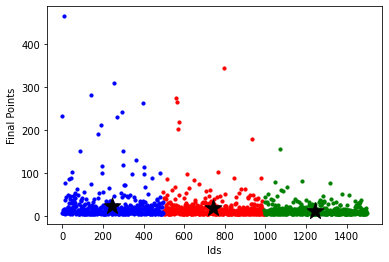

In [42]:
cluster_data = np.array(list(zip(identity, final_points)))

#Define 'cluster_num' for for number of clusters.

cluster_num = 3
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
plt.ylabel('Final Points')
plt.xlabel('Ids')
colors = ['r', 'g', 'b']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

In [38]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['KmeansClusterPredicted_3Clusters'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3])

array([[   0,    0,    0,    0],
       [  77,   10,   13,    0],
       [ 116,  284,    0,    0],
       [   0, 1000,    0,    0]])

## Clustering data with K-means algorithm and exporting data in ClusteredTestIteration.csv file - 4 Clusters

In [43]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++',n_init=1, max_iter=5000, tol=0.0001, verbose=0, random_state=None)
KmeansClusterPredicted_4Clusters = kmeans.fit_predict(points_data)


df = pd.DataFrame(data=KmeansClusterPredicted_4Clusters,columns=["Column1"])
data = data.assign(KmeansClusterPredicted_4Clusters=KmeansClusterPredicted_4Clusters)
#print(data)
data.to_csv('ClusteredTestIteration.csv')
print(data.head())

                              Company Name  Company id  Count Page View  \
0  H√ºttenes-Albertus Chemische Werke GmbH         326         0.107686   
1                                 Impag AG       23107         0.000558   
2          STOCKMEIER Chemie GmbH & Co. KG       10176         0.004743   
3                  Rascor International AG        3406         0.053703   
4           JARBUR EUROCHEM Sp√≥≈Çka Jawna       19068         1.000000   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.333011        0.085443      0.065574          0.228916   
1      0.000000        0.041139      0.000000          0.003442   
2      0.000968        0.037975      1.000000          0.024096   
3      0.075508        0.031646      0.016393          0.180723   
4      0.913843        0.661392      0.016393          0.838210   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                   0.020527         1.000000    465.736647   
1                   

## Integrating results for cross verification

In [46]:
# Importing the dataset
cluster = pd.read_csv('ClusteredTestIteration.csv')

print('First look at the data set: ')
print(cluster.head())

First look at the data set: 
   id                             Company Name  Company id  Count Page View  \
0   0                   H√§ffner Gmbh & Co. Kg         136         0.006556   
1   1                            Traditem Gmbh         141         0.415818   
2   2                       Syskem Chemie Gmbh         144         0.015483   
3   3         Cofermin Chemicals Gmbh & Co. Kg         149         0.025387   
4   4  ELTON INTERNATIONAL TRADING COMPANY S.A         169         0.026364   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.013553        0.022152           0.0          0.017212   
1      0.467570        0.693038           0.0          1.000000   
2      0.032914        0.015823           0.0          0.048193   
3      0.033882        0.000000           0.0          0.084337   
4      0.050339        0.006329           0.0          0.032702   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                        0.0  

In [47]:
identity =cluster['id'].values
final_points= cluster['Final Points'].values


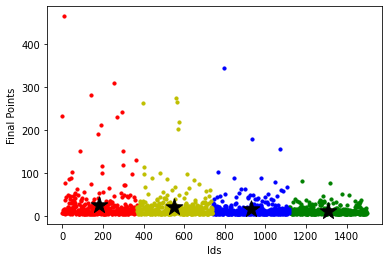

In [49]:
cluster_data = np.array(list(zip(identity, final_points)))

#Define 'cluster_num' for for number of clusters.

cluster_num = 4
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
plt.ylabel('Final Points')
plt.xlabel('Ids')
colors = ['r', 'g', 'b','y']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

In [53]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['KmeansClusterPredicted_4Clusters'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3])

array([[   0,    0,    0,    0],
       [   9,    9,   19,   63],
       [ 257,    0,    0,  143],
       [1000,    0,    0,    0]])

## Clustering data with K-means algorithm and exporting data in ClusteredTestIteration.csv file - 5 Clusters

In [43]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++',n_init=1, max_iter=5000, tol=0.0001, verbose=0, random_state=None)
KmeansClusterPredicted_4Clusters = kmeans.fit_predict(points_data)


df = pd.DataFrame(data=KmeansClusterPredicted_4Clusters,columns=["Column1"])
data = data.assign(KmeansClusterPredicted_4Clusters=KmeansClusterPredicted_4Clusters)
#print(data)
data.to_csv('ClusteredTestIteration.csv')
print(data.head())

                              Company Name  Company id  Count Page View  \
0  H√ºttenes-Albertus Chemische Werke GmbH         326         0.107686   
1                                 Impag AG       23107         0.000558   
2          STOCKMEIER Chemie GmbH & Co. KG       10176         0.004743   
3                  Rascor International AG        3406         0.053703   
4           JARBUR EUROCHEM Sp√≥≈Çka Jawna       19068         1.000000   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.333011        0.085443      0.065574          0.228916   
1      0.000000        0.041139      0.000000          0.003442   
2      0.000968        0.037975      1.000000          0.024096   
3      0.075508        0.031646      0.016393          0.180723   
4      0.913843        0.661392      0.016393          0.838210   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                   0.020527         1.000000    465.736647   
1                   

## Integrating results for cross verification

In [46]:
# Importing the dataset
cluster = pd.read_csv('ClusteredTestIteration.csv')

print('First look at the data set: ')
print(cluster.head())

First look at the data set: 
   id                             Company Name  Company id  Count Page View  \
0   0                   H√§ffner Gmbh & Co. Kg         136         0.006556   
1   1                            Traditem Gmbh         141         0.415818   
2   2                       Syskem Chemie Gmbh         144         0.015483   
3   3         Cofermin Chemicals Gmbh & Co. Kg         149         0.025387   
4   4  ELTON INTERNATIONAL TRADING COMPANY S.A         169         0.026364   

   Count Search  Count Requests  Count Orders  Count Session Id  \
0      0.013553        0.022152           0.0          0.017212   
1      0.467570        0.693038           0.0          1.000000   
2      0.032914        0.015823           0.0          0.048193   
3      0.033882        0.000000           0.0          0.084337   
4      0.050339        0.006329           0.0          0.032702   

   Total Order Value In Euro  Monetize Amount  Final Points  \
0                        0.0  

In [47]:
identity =cluster['id'].values
final_points= cluster['Final Points'].values


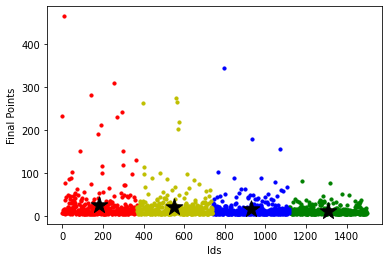

In [49]:
cluster_data = np.array(list(zip(identity, final_points)))

#Define 'cluster_num' for for number of clusters.

cluster_num = 4
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
plt.ylabel('Final Points')
plt.xlabel('Ids')
colors = ['r', 'g', 'b','y']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

In [53]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['KmeansClusterPredicted_4Clusters'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3])

array([[   0,    0,    0,    0],
       [   9,    9,   19,   63],
       [ 257,    0,    0,  143],
       [1000,    0,    0,    0]])